### 支持向量机
##### 在分布中找出一个超平面，使得泛化误差和泛化性能较好
##### 通过找出边际的最大决策边界

##### d=w*(x1-x2)/||w||=2/||w||



In [90]:
# 导入所需的库
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

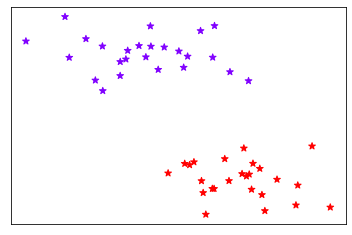

In [91]:
# 实例化数据集，可视化数据集,创建的数据集有两个中心
x,y=make_blobs(n_samples=50,centers=2,random_state=0,cluster_std=0.5)
plt.scatter(x[:,0],x[:,1],c=y,cmap="rainbow",marker="*",alpha=1,s=50)
plt.xticks([])
plt.yticks([])
plt.show()

### 绘制决策边界
##### 使用matplotlib.axes.Axes.contour([x,y],z,[levels]，**kwargs)
##### 三个参数分别为x、y轴坐标的取值，z为平面所有的点所对应的高度，leves用于显示等高线（默认显示所有等高线）

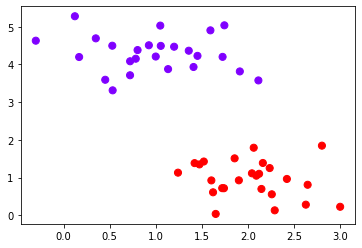

In [92]:
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
ax=plt.gca() #获取当前子图，如果不存在，创建新的子图

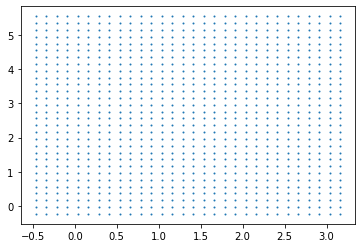

In [93]:
# 画出决策边界，制作网格，使用函数meshgrid
# 获取两个坐标轴上的最大值和最小值
xlim=ax.get_xlim()
ylim=ax.get_ylim()

# 在最大值和最小值之间形成30个规律的数据
axisx=np.linspace(xlim[0],xlim[1],30)
axisy=np.linspace(ylim[0],ylim[1],30)

axisy,axisx=np.meshgrid(axisy,axisx) # 将两个数组进行拼接

# 将二维数组作为countour函数中的x和y
# 使用meshgrid函数将两个一维向量转换为特征矩阵
# 核心是将两个特征向量广播，以便于取y.shape*x.shape这么多的坐标点的横纵坐标
xy=np.vstack([axisx.ravel(),axisy.ravel()]).T

# ravel()降维函数，vastck能够将多个结果一样的一维数组按行堆叠起来
# xy就是已经形成的网格，它是遍布整个画布上面密密麻麻的点
plt.scatter(xy[:,0],xy[:,1],s=1,cmap="rainbow")
plt.show()

(-0.22771027454251097, 5.541407658378895)

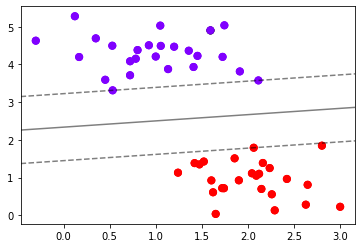

In [94]:
# 进行SVC建模
clf=SVC(kernel="linear").fit(x,y)
z=clf.decision_function(xy).reshape(axisx.shape) #得出决策边界
# 该接口返回每个输入的样本所对应的到决策边界的距离
# 然后将这个距离转换为axisx的形状，这是因为画图的函数counter要求z的结构必须与x和y保持一致

# 绘制图像
ax.contour(axisx,axisy,z
          ,colors="k"
           ,levels=[-1,0,1] #绘制三条等高线，分别为z取三值的三条线
           ,alpha=0.5
           ,linestyles=["--","-","--"]
          )
ax.set_xlim(xlim)
ax.set_ylim(ylim)


# 使用一个点进行观察
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
plt.scatter(x[10,0],x[10,1],c="black",s=50,cmap="rainbow")

clf.decision_function(x[10].reshape(1,2))


plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
ax=plt.gca()
ax.contour(axisx,axisy,z
          ,colors="k"
           ,levels=[-1,0,1] #绘制三条等高线，分别为z取三值的三条线
           ,alpha=0.5
           ,linestyles=["--","-","--"]
          )
ax.set_xlim(xlim)
ax.set_ylim(ylim)

(-0.22771027454251097, 5.541407658378895)

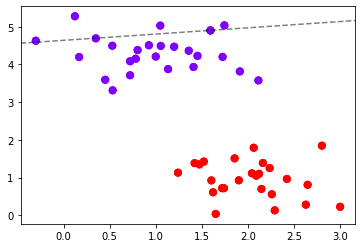

In [95]:
# 使用一个点进行观察
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
plt.scatter(x[10,0],x[10,1],c="black",s=50,cmap="rainbow")

d=clf.decision_function(x[10].reshape(1,2))
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")

ax=plt.gca()
ax.contour(axisx,axisy,z
          ,colors="k"
           ,levels=[d] 
           ,alpha=0.5
           ,linestyles=["--"]
          )
ax.set_xlim(xlim)
ax.set_ylim(ylim)


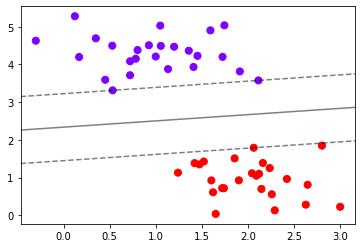

In [96]:
def plot_svc_decision_function(model,ax=None):
    if ax==None:
        ax=plt.gca() #创建子图
    
    # 画出决策边界，制作网格，使用函数meshgrid
    # 获取两个坐标轴上的最大值和最小值
    xlim=ax.get_xlim()
    ylim=ax.get_ylim()

    # 在最大值和最小值之间形成30个规律的数据
    axisx=np.linspace(xlim[0],xlim[1],30)
    axisy=np.linspace(ylim[0],ylim[1],30)

    axisy,axisx=np.meshgrid(axisy,axisx) # 将两个数组进行拼接

    # 将二维数组作为countour函数中的x和y
    # 使用meshgrid函数将两个一维向量转换为特征矩阵
    # 核心是将两个特征向量广播，以便于取y.shape*x.shape这么多的坐标点的横纵坐标
    xy=np.vstack([axisx.ravel(),axisy.ravel()]).T

    # 进行SVC建模
    z=model.decision_function(xy).reshape(axisx.shape) #得出决策边界
    # 该接口返回每个输入的样本所对应的到决策边界的距离
    # 然后将这个距离转换为axisx的形状，这是因为画图的函数counter要求z的结构必须与x和y保持一致
    
    ax.contour(axisx,axisy,z
              ,colors="k"
               ,levels=[-1,0,1] #绘制三条等高线，分别为z取三值的三条线
               ,alpha=0.5
               ,linestyles=["--","-","--"]
              )
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    

clf=SVC(kernel="linear").fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow") 
plot_svc_decision_function(clf)

In [97]:
clf.predict(x)

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [98]:
clf.score(x,y) #得出分数

1.0

In [99]:
# 饭返回支持向量
clf.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [2.06051753, 1.79059891]])

In [100]:
# 非线性可分
from sklearn.datasets import make_circles
x,y=make_circles(100,factor=0.1,noise=.1)

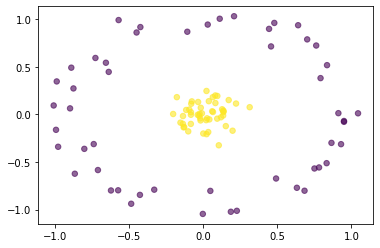

In [101]:
plt.scatter(x[:,0],x[:,1],c=y,s=30,marker="o",alpha=0.6)
plt.show()

0.67

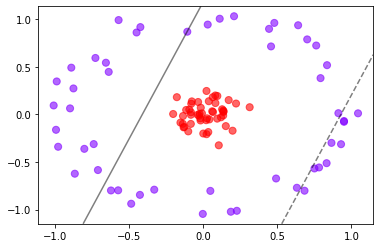

In [102]:
clf=SVC(kernel="linear").fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,marker="o",alpha=0.6,cmap="rainbow")
plot_svc_decision_function(clf)
clf.score(x,y)

In [103]:
# 升维
# 定义一个新的维度r
r=np.exp(-(x**2).sum(1))
r.shape

(100,)

In [104]:
rlim=np.linspace(min(r),max(r),100)
rlim.shape

(100,)

In [105]:
# 绘制三维图像
from mpl_toolkits import mplot3d

# 定义一个绘制3维图像的函数
# elve表示上下旋转的角度
# azim表示平行旋转的角度
def plot_3D(elev=30,azim=30,x=x,y=y):
    ax=plt.subplot(projection="3d")
    ax.scatter3D(x[:,0],x[:,1],r,c=y,s=50,cmap="rainbow")
    ax.view_init(elev=elev,azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    plt.show()
    
# 使用关联函数
from ipywidgets import interact,fixed

interact(plot_3D,elev=[0,30,60,90,120],azip=(-180,180),x=fixed(x),y=fixed(y))
plt.show()


    

interactive(children=(Dropdown(description='elev', index=1, options=(0, 30, 60, 90, 120), value=30), IntSlider…

### 非线性SVM与核函数
##### 核技巧：一种能够使用数据原始空间中的向量计算来表示升维后的空间中的点积结果的数学方式，K(u,v)=f(u)*f(v)
##### 线性核:'linear',K(x,y)=x.T*y,无gamma,degree,coef0超参数
##### 非线性核（多项式核，偏线性）：'poly',K(x,y)=(gamma(x*y)+r)^d ,有gamma,degree,coef0参数
##### 双曲正切核(非线性)：'sigmoid',K(x,y)=tanh(gamma(x*y)+r) 没有degree
##### 高斯径向基（偏非线性）:'rbf',K(x,y)=e^(-gamma||x-y||^2),gamma>0 ,没有degree,coef0

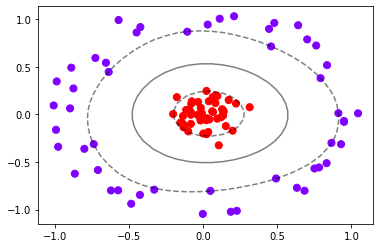

In [107]:
# 非线性边界

clf=SVC(kernel="rbf").fit(x,y)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

### 探索核函数在不同数据集上的表现

In [110]:
# 导入模块
from sklearn.svm import SVC
from sklearn.datasets import make_circles,make_moons,make_blobs,make_classification
from sklearn import svm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.colors import ListedColormap #带色彩的画布

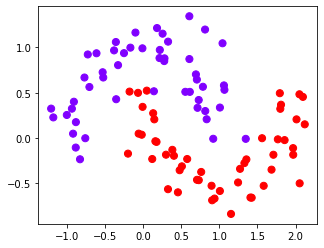

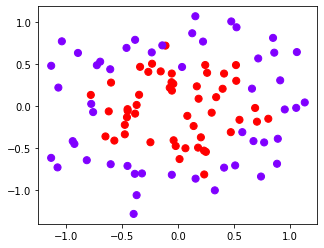

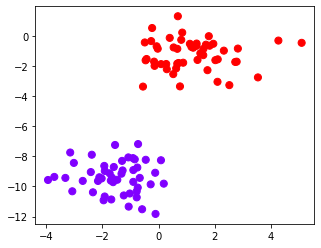

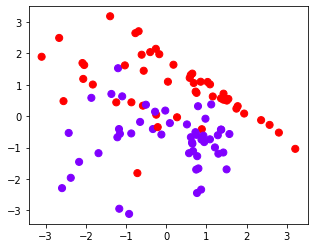

In [116]:
# 创建数据集，定义核函数的选择

n_samples=100 #创建样本数

datasets=[
    make_moons(n_samples=n_samples,noise=0.2,random_state=0)
    ,make_circles(n_samples=n_samples,noise=0.2,factor=0.5,random_state=1)
    ,make_blobs(n_samples=n_samples,centers=2,random_state=2)
    ,make_classification(n_samples=n_samples,n_features=2,n_informative=2,n_redundant=0,random_state=3)
    ]

# 核函数
kernel=['linear','poly','sigmoid','rbf']

# 查看数据集
for i,y in datasets:
    plt.figure(figsize=(5,4))
    plt.scatter(i[:,0],i[:,1],c=y,s=50,cmap="rainbow")
    

##### 一个四个数据集，四个核函数，总共需要16个图来观察结果


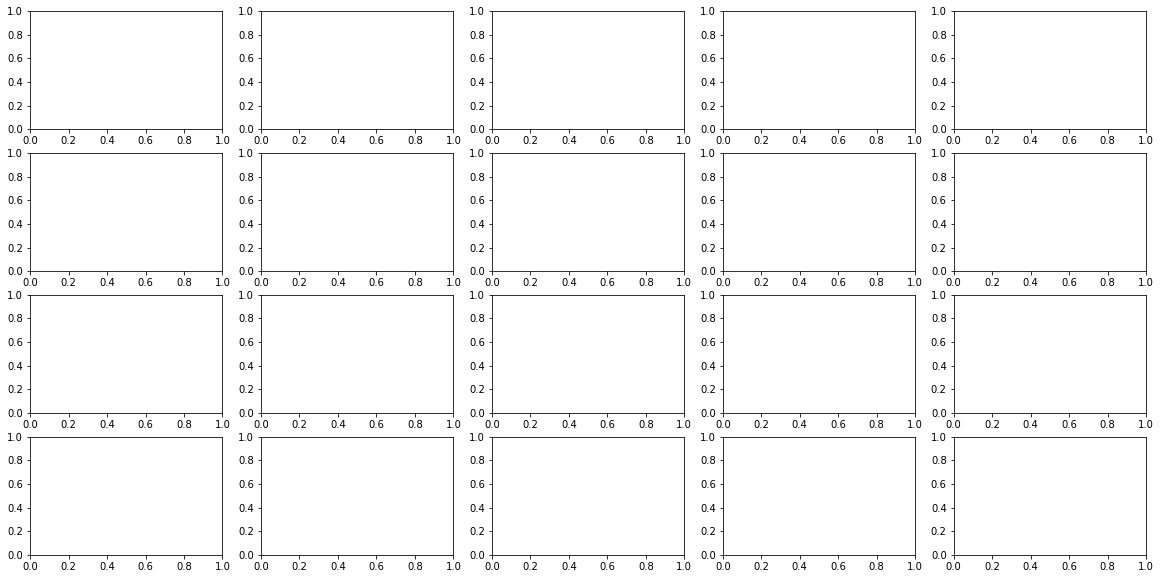

In [117]:
# 创建子图
nrows=len(datasets)
ncols=len(kernel)+1
fig,axes=plt.subplots(nrows,ncols,figsize=(20,10))

d:\miniconda3\envs\torch_qxy\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
d:\miniconda3\envs\torch_qxy\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
d:\miniconda3\envs\torch_qxy\lib\site-packages\ipykernel_launcher.py:47: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadril

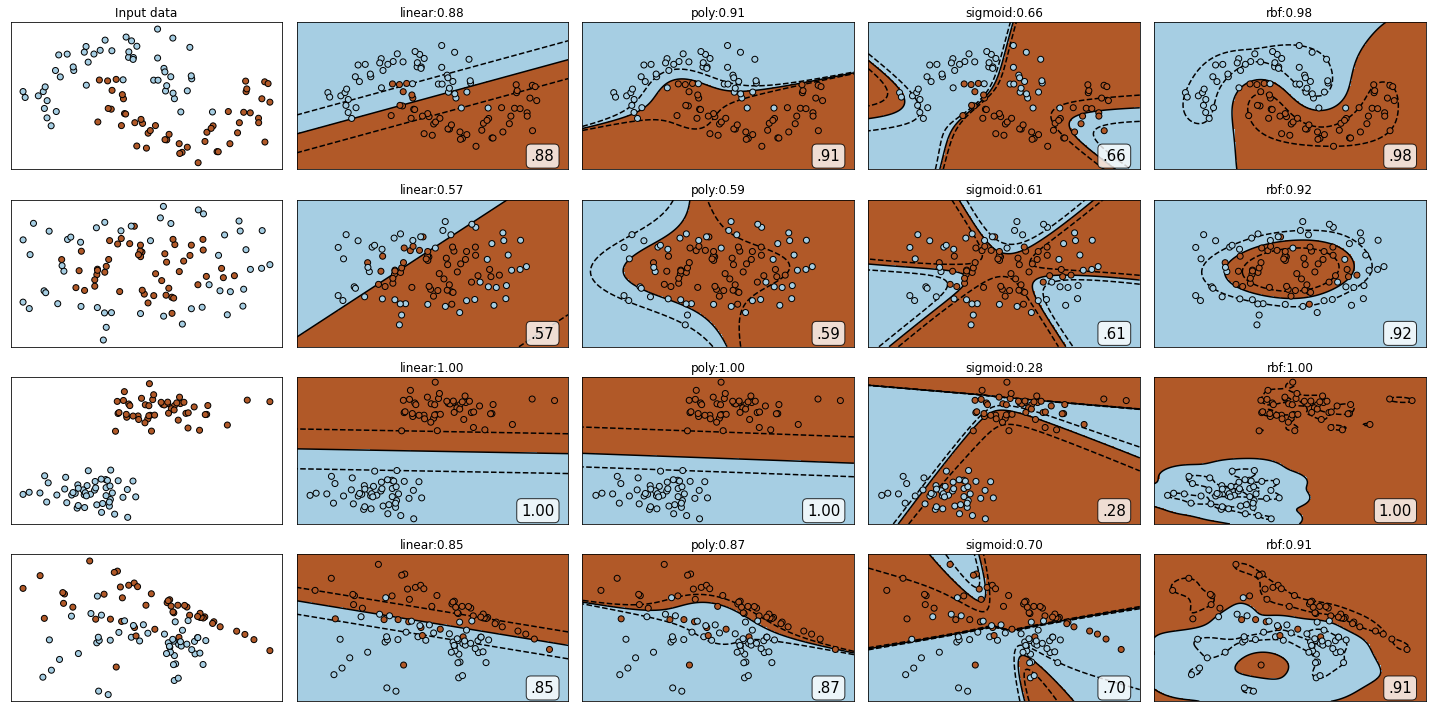

In [156]:
# 创建子图
nrows=len(datasets)
ncols=len(kernel)+1
fig,axes=plt.subplots(nrows,ncols,figsize=(20,10))

for ds_cnt,(x,y) in enumerate(datasets):
    # 在图像的第一列放置原始数据的分布
    ax=axes[ds_cnt,0]
    if ds_cnt==0:
        ax.set_title("Input data")
    ax.scatter(x[:,0],x[:,1],c=y,zorder=10,cmap=plt.cm.Paired,edgecolors="k")
    ax.set_xticks([])
    ax.set_yticks([])
    
    # 第二层循环：在不同的核函数中循环
    # 从图像第二列开始
    for est_idx,k in enumerate(kernel):
        # 定义图的位置
        ax=axes[ds_cnt,est_idx+1]
        
        # 建模
        clf=SVC(kernel=k,gamma=2).fit(x,y)
        score=clf.score(x,y)
        
        # 绘制图像本身分布散点图
        ax.scatter(x[:,0],x[:,1],c=y,zorder=10,cmap=plt.cm.Paired,edgecolors="k")
        
        # 绘制支持向量
        ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=50,facecolor='none',edgecolors="k")
        

        
        # 获取最大，最小值
        x_min,x_max=x[:,0].min()-.5,x[:,0].max()+.5
        y_min,y_max=x[:,1].min()-.5,x[:,1].max()+.5
        # 绘制决策边界
        # 找网格
        # 一次性使用最大值和最小值生成网格
        # 表示为[起始值：阶数值：步长]
        # 如果步长为复数，则其整数部分就是起始值和结束值之间创建数据的数量（点的个数）
        xx,yy=np.mgrid[x_min:x_max:200j,y_min:y_max:200j]
        # np.c_类似于np,vstack()
        z=clf.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    
        # 填充等高线不同区域的颜色
        # 为z>0绘制一种颜色
        ax.pcolormesh(xx,yy,z>0,cmap=plt.cm.Paired)
        
        #绘制等高线
        ax.contour(xx,yy,z,colors=['k','k','k'],linestyles=['--','-','--'],levels=[-1,0,1])
        
        
        
        # 设置标题以及不显示坐标
        ax.set_title("%s:%.2f"%(k,score))
        ax.set_xticks([])
        ax.set_yticks([])

        # 设置标题,第一行
        #if ds_cnt==0:
        #    ax.set_title(k)
            
        # 为每张图添加分类的分数
        ax.text(0.95,0.06,('%.2f'%score).lstrip('0')
               ,size=15
                ,bbox=dict(boxstyle="round",alpha=0.8,facecolor="white")# 为分数添加一个白色格子用于显示
                ,transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
                ,horizontalalignment='right' #位于坐标轴什么方向
               )
        
plt.tight_layout()
plt.show()

        

##### 从上图可以看出，在大多数情况下，rbf（高斯径向基）是最好的，线性可分的时候，采用'poly'会好于‘linear’
##### ,sigmoid在大多数情况下，都比较差
